# Convolutions with PyTorch

In [ ]:
# Basic Imports
import numpy as np
import scipy.signal
import torch
import torch.nn as nn

## What is Convolution ?

In [ ]:
a = [1, 2, 3, 4]
b = [5, 6, 7, 8]
# a * b
result = np.convolve(a, b)
print(f"result = {result}")

result = [ 5 16 34 60 61 52 32]


In [ ]:
arr1 = np.random.random(100000)
arr2 = np.random.random(100000)

In [ ]:
%%timeit
np.convolve(arr1, arr2)

4.11 s ± 684 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
a = [1, 2, 3, 4]
b = [5, 6, 7, 8]
# a * b
result = scipy.signal.fftconvolve(a, b)
print(f"result = {result}")

result = [ 5. 16. 34. 60. 61. 52. 32.]


In [ ]:
%%timeit
scipy.signal.fftconvolve(arr1, arr2)

12.7 ms ± 838 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Convolution Examples

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
def visualize_images(image_01, image_02):
  # Create a figure with two subplots
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  # Plot the original image on the first subplot
  axes[0].imshow(image_01)
  axes[0].set_title('Original Image')
  axes[0].axis('off')

  # Plot the output image on the second subplot
  axes[1].imshow(image_02, cmap='gray')  # Use 'gray' colormap for grayscale images
  axes[1].set_title('Output Image (Convolved)')
  axes[1].axis('off')

  # Show the subplots
  plt.show()

### Kernel for Blur (using averaging)

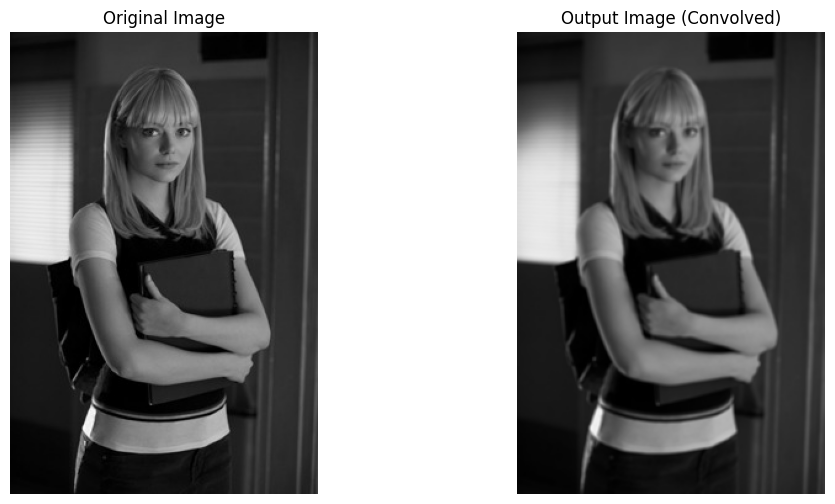

In [ ]:
image_path = "/content/Emma-Stone-gray.jpg"

# Load the image
image = cv2.imread(image_path)

kernel = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
])

output_image = cv2.filter2D(image, -1, kernel)
visualize_images(image, output_image)

### Left Sobel Kernel for Edge Detection

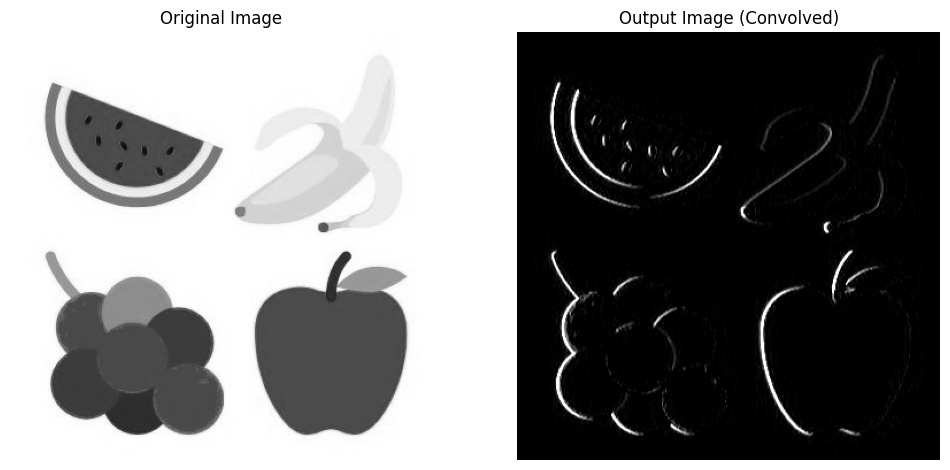

In [ ]:
image_path = "/content/fruits-gray.jpg"

# Load the image
image = cv2.imread(image_path)

kernel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1],
])

output_image = cv2.filter2D(image, -1, kernel)
visualize_images(image, output_image)

### Line Detection

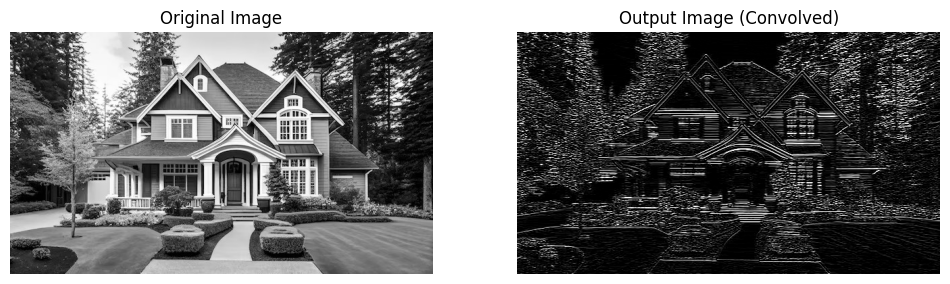

In [ ]:
image_path = "/content/house-gray.jpg"

# Load the image
image = cv2.imread(image_path)

# Detect Horizontal lines
kernel = np.array([
    [-1, -1, -1],
    [2, 2, 2],
    [-1, -1, -1],
])

output_image = cv2.filter2D(image, -1, kernel)
visualize_images(image, output_image)

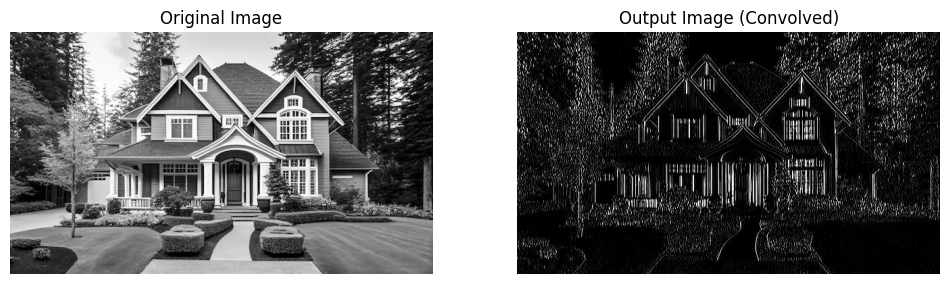

In [ ]:
image_path = "/content/house-gray.jpg"

# Load the image
image = cv2.imread(image_path)

# Detect Vertical lines
kernel = np.array([
    [-1, 2, -1],
    [-1, 2, -1],
    [-1, 2, -1],
])

output_image = cv2.filter2D(image, -1, kernel)
visualize_images(image, output_image)

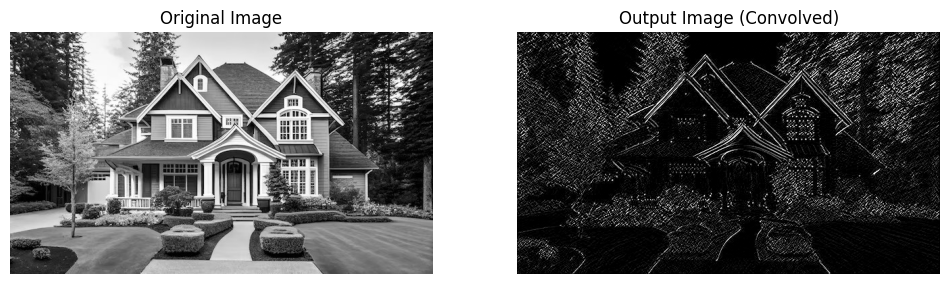

In [ ]:
image_path = "/content/house-gray.jpg"

# Load the image
image = cv2.imread(image_path)

# Detect 45 degree lines
kernel = np.array([
    [-1, -1, 2],
    [-1, 2, -1],
    [2, -1, -1],
])

output_image = cv2.filter2D(image, -1, kernel)
visualize_images(image, output_image)

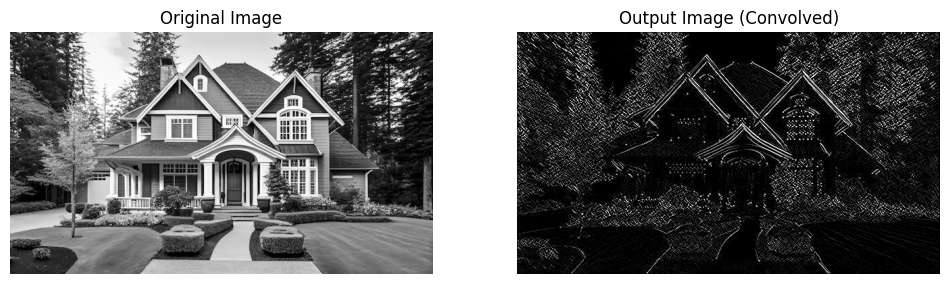

In [ ]:
image_path = "/content/house-gray.jpg"

# Load the image
image = cv2.imread(image_path)

# Detect 135 degree lines
kernel = np.array([
    [2, -1, -1],
    [-1, 2, -1],
    [-1, -1, 2],
])

output_image = cv2.filter2D(image, -1, kernel)
visualize_images(image, output_image)

### Edge Detection

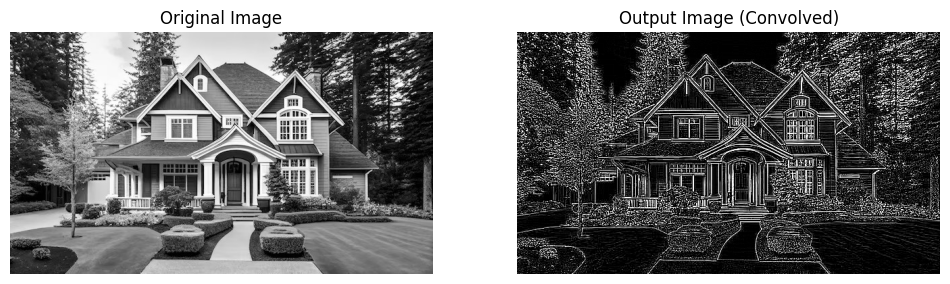

In [ ]:
image_path = "/content/house-gray.jpg"

# Load the image
image = cv2.imread(image_path)

# Detect edges
kernel = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1],
])

output_image = cv2.filter2D(image, -1, kernel)
visualize_images(image, output_image)

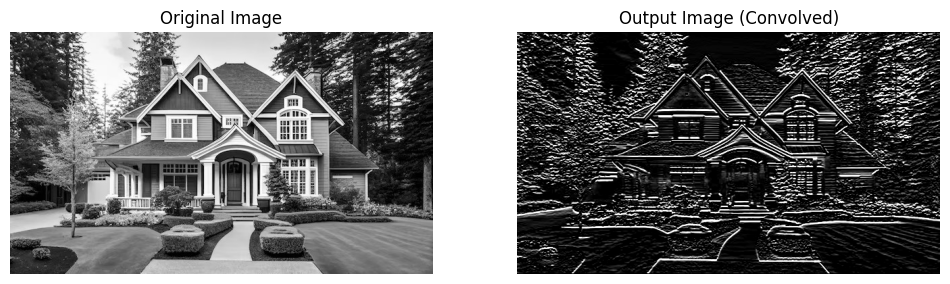

In [ ]:
image_path = "/content/house-gray.jpg"

# Load the image
image = cv2.imread(image_path)

# Sobel Horizontal Edge Operator
kernel = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1],
])

output_image = cv2.filter2D(image, -1, kernel)
visualize_images(image, output_image)

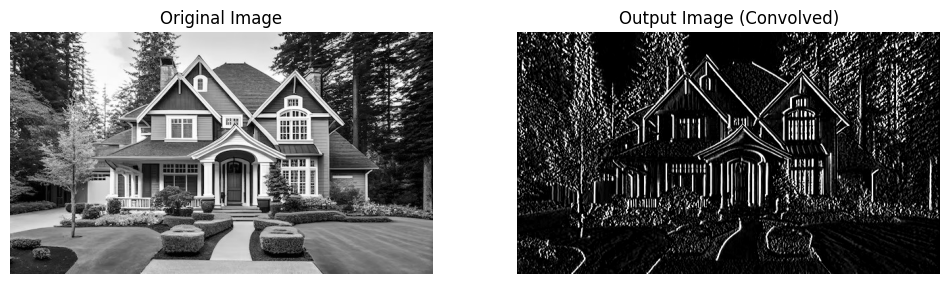

In [ ]:
image_path = "/content/house-gray.jpg"

# Load the image
image = cv2.imread(image_path)

# Sobel Vertical Edge Operator
kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
])

output_image = cv2.filter2D(image, -1, kernel)
visualize_images(image, output_image)